In [2]:
import xarray as xr
import numpy as np
import pandas as pd
from itertools import product, cycle

# Ignore Runtime warnings
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

# Propagate attributes during computation
xr.set_options(keep_attrs=True);

In [3]:
DS = xr.open_dataset('processed/processed__NO2___/NO2___1-2-2023__6-2-2023.nc') 
DS2 = xr.open_dataset('L3_data/S5P_OFFL_L3__NO2____20230201T002420_20230201T020550_27476_03_020400_20230202T162459.nc') 
DS2.info()

xarray.Dataset {
dimensions:
	time = 1 ;
	latitude = 431 ;
	longitude = 360 ;

variables:
	float64 sensor_altitude(time, latitude, longitude) ;
		sensor_altitude:description = altitude of the satellite with respect to the geodetic sub-satellite point (WGS84) ;
		sensor_altitude:units = m ;
	float64 solar_zenith_angle(time, latitude, longitude) ;
		solar_zenith_angle:description = zenith angle of the Sun at the ground pixel location (WGS84); angle measured away from the vertical ;
		solar_zenith_angle:units = degree ;
	float64 solar_azimuth_angle(time, latitude, longitude) ;
		solar_azimuth_angle:description = azimuth angle of the Sun at the ground pixel location (WGS84); angle measured East-of-North ;
		solar_azimuth_angle:units = degree ;
	float64 sensor_zenith_angle(time, latitude, longitude) ;
		sensor_zenith_angle:description = zenith angle of the satellite at the ground pixel location (WGS84); angle measured away from the vertical ;
		sensor_zenith_angle:units = degree ;
	float64 

In [ ]:
import matplotlib.pyplot as plt

# Select the 'tropospheric_NO2_column_number_density' and 'absorbing_aerosol_index' variables
tropospheric_NO2 = DS['tropospheric_NO2_column_number_density']
absorbing_aerosol = DS['absorbing_aerosol_index']

# Average over the latitude and longitude dimensions to get a time series
tropospheric_NO2_timeseries = tropospheric_NO2.mean(dim=['latitude', 'longitude'])
absorbing_aerosol_timeseries = absorbing_aerosol.mean(dim=['latitude', 'longitude'])

# Create a new figure
plt.figure()

# Plot the 'tropospheric_NO2_column_number_density' time series
plt.plot(tropospheric_NO2_timeseries.time, tropospheric_NO2_timeseries, label='Tropospheric NO2')

# Plot the 'absorbing_aerosol_index' time series
plt.plot(absorbing_aerosol_timeseries.time, absorbing_aerosol_timeseries, label='Absorbing Aerosol Index')

# Add a legend
plt.legend()

# Add labels for the x and y axes
plt.xlabel('Time')
plt.ylabel('Value')

# Show the plot
plt.show()


In [18]:
DS = xr.open_dataset('processed/processed__NO2___/NO2___1-2-2023__6-2-2023.nc') 
df1 = DS.to_dataframe()
df1
#df.to_csv('processed/processed__NO2___/NO2___Feb.csv')

# Open the .nc file
#dataset = xr.open_dataset(first_file)

# Convert the xarray Dataset to a pandas DataFrame


# Write the dataframe to aa CSV
#df.to_csv('processed/processed__NO2___/NO2_EastPalestine_1-2-2023__5-2-23.csv')

sensor_altitude  \
latitude   longitude  time                                   
-84.815312 -80.742011 2023-02-01 17:40:57              NaN   
                      2023-02-02 17:22:00              NaN   
                      2023-02-03 17:03:02              NaN   
                      2023-02-03 18:44:33              NaN   
                      2023-02-04 16:44:06              NaN   
...                                                    ...   
 40.972726  41.998186 2023-02-04 16:44:06              NaN   
                      2023-02-04 18:25:37              NaN   
                      2023-02-05 16:25:09              NaN   
                      2023-02-05 18:06:39              NaN   
                      2023-02-06 17:47:44              NaN   

                                           solar_zenith_angle  \
latitude   longitude  time                                      
-84.815312 -80.742011 2023-02-01 17:40:57                 NaN   
                      2023-02-02 17:22:00                 NaN   
                      2023-02-03 17:03:02                 NaN   
                      2023-02-03 18:44:33                 NaN   
                      2023-02-04 16:44:06                 NaN   
...                                                       ...   
 40.972726  41.998186 2023-02-04 16:44:06                 NaN   
                      2023-02-04 18:25:37                 NaN   
                      2023-02-05 16:25:09                 NaN   
                      2023-02-05 18:06:39                 NaN   
                      2023-02-06 17:47:44                 NaN   

                                           solar_azimuth_angle  \
latitude   longitude  time                                       
-84.815312 -80.742011 2023-02-01 17:40:57                  NaN   
                      2023-02-02 17:22:00                  NaN   
                      2023-02-03 17:03:02                  NaN   
                      2023-02-03 18:44:33                  NaN   
                      2023-02-04 16:44:06                  NaN   
...                                                        ...   
 40.972726  41.998186 2023-02-04 16:44:06                  NaN   
                      2023-02-04 18:25:37                  NaN   
                      2023-02-05 16:25:09                  NaN   
                      2023-02-05 18:06:39                  NaN   
                      2023-02-06 17:47:44                  NaN   

                                           sensor_zenith_angle  \
latitude   longitude  time                                       
-84.815312 -80.742011 2023-02-01 17:40:57                  NaN   
                      2023-02-02 17:22:00                  NaN   
                      2023-02-03 17:03:02                  NaN   
                      2023-02-03 18:44:33                  NaN   
                      2023-02-04 16:44:06                  NaN   
...                                                        ...   
 40.972726  41.998186 2023-02-04 16:44:06                  NaN   
                      2023-02-04 18:25:37                  NaN   
                      2023-02-05 16:25:09                  NaN   
                      2023-02-05 18:06:39                  NaN   
                      2023-02-06 17:47:44                  NaN   

                                           sensor_azimuth_angle  \
latitude   longitude  time                                        
-84.815312 -80.742011 2023-02-01 17:40:57                   NaN   
                      2023-02-02 17:22:00                   NaN   
                      2023-02-03 17:03:02                   NaN   
                      2023-02-03 18:44:33                   NaN   
                      2023-02-04 16:44:06                   NaN   
...                                                         ...   
 40.972726  41.998186 2023-02-04 16:44:06                   NaN   
                      2023-02-04 18:25:37                   NaN   
  

In [15]:
dft = DS['tropospheric_NO2_column_number_density'].to_dataframe()
#print(dft)
max_time = dft.index.get_level_values('time').max()
min_time = dft.index.get_level_values('time').min()

print("Max time:", max_time)
print("Min time:", min_time)




Max time: 2023-02-06 17:47:44
Min time: 2023-02-01 17:40:57


In [8]:
DS = DS.resample(time='1D').mean(dim='time', skipna=None)

In [9]:
VARIABLE = 'tropospheric_NO2_column_number_density'
DS[VARIABLE].attrs

{'description': 'tropospheric vertical column of NO2',
 'units': 'mol/m2',
 'grid_mapping': 'spatial_ref'}

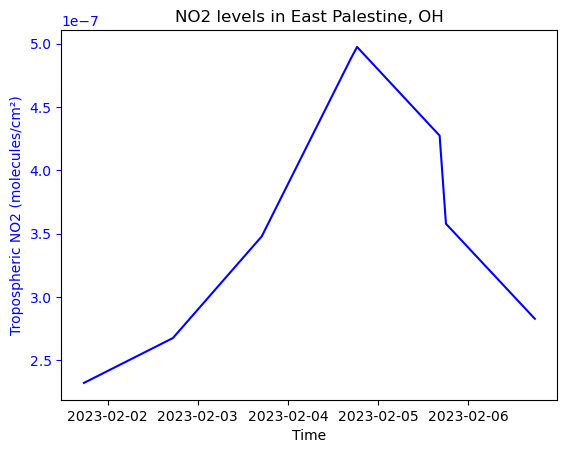

In [6]:
import matplotlib.pyplot as plt

# Select the 'tropospheric_NO2_column_number_density' and 'absorbing_aerosol_index' variables
tropospheric_NO2 = DS['tropospheric_NO2_column_number_density']
#absorbing_aerosol = DS['absorbing_aerosol_index']

# Average over the latitude and longitude dimensions to get a time series
tropospheric_NO2_timeseries = tropospheric_NO2.mean(dim=['latitude', 'longitude'])
absorbing_aerosol_timeseries = absorbing_aerosol.mean(dim=['latitude', 'longitude'])

# Create a new figure and subplot
fig, ax1 = plt.subplots()

# Plot the 'absorbing_aerosol_index' time series on the first y-axis
ax1.plot(tropospheric_NO2_timeseries.time, tropospheric_NO2_timeseries, color='b')
ax1.set_xlabel('Time')
ax1.set_ylabel('Tropospheric NO2 (molecules/cm', color='b')
ax1.tick_params('y', colors='b')

# Add a title to the plot
ax1.set_title('NO2 levels in East Palestine, OH')

# Show the plot
plt.show()
